In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
# --- LOAD DATA ---
df = pd.read_csv("uber - uber.csv")   # change path if needed
# Drop unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

# --- EXPLORATORY DATA ANALYSIS (EDA) ---
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

Dataset Shape: (200000, 8)

Columns: ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

Missing Values:
 key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Summary Statistics:
          fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967153 

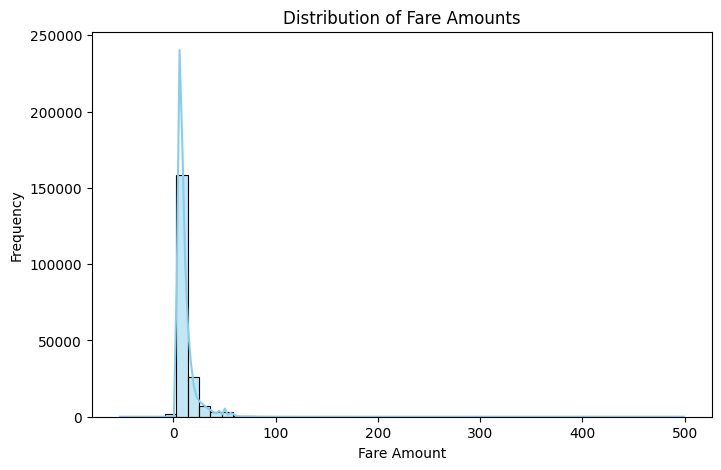

In [3]:
# Distribution of target variable
plt.figure(figsize=(8,5))
sns.histplot(df['fare_amount'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Fare Amounts")
plt.xlabel("Fare Amount")
plt.ylabel("Frequency")
plt.show()

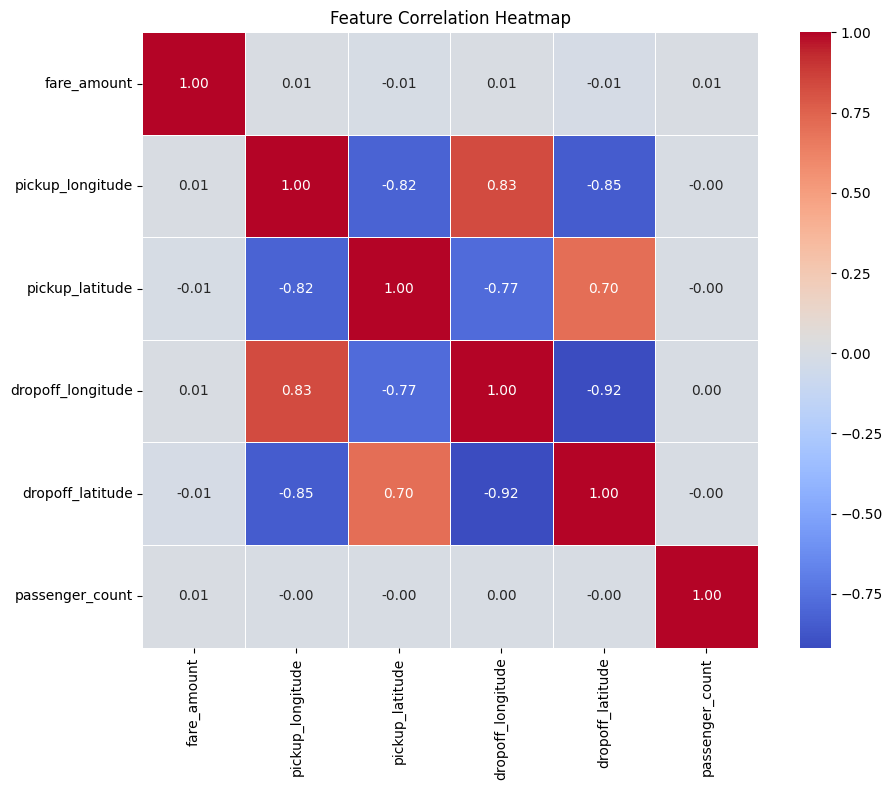

In [6]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

In [7]:
# --- DATA CLEANING ---
df = df.dropna()
df_num = df.select_dtypes(include=['float64', 'int64'])

# Separate features and target
target = [c for c in df_num.columns if 'fare' in c.lower() or 'price' in c.lower()]
y = df_num[target[0]]
X = df_num.drop(columns=[target[0]])

In [8]:
# --- TRAIN/TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# --- SCALING ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- MODEL WITHOUT PCA ---
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred = lr.predict(X_test_scaled)

r2_no_pca = r2_score(y_test, pred)
rmse_no_pca = mean_squared_error(y_test, pred)
mae_no_pca = mean_absolute_error(y_test, pred)

print("\n----- MODEL WITHOUT PCA -----")
print("R²:", r2_no_pca)
print("RMSE:", rmse_no_pca)
print("MAE:", mae_no_pca)


----- MODEL WITHOUT PCA -----
R²: 0.00034152697862199766
RMSE: 103.98840712661466
MAE: 6.068508583048773


In [12]:
# --- MODEL WITH PCA ---
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)
pred_pca = lr_pca.predict(X_test_pca)

r2_pca = r2_score(y_test, pred_pca)
rmse_pca = mean_squared_error(y_test, pred_pca)
mae_pca = mean_absolute_error(y_test, pred_pca)

print("\n----- MODEL WITH PCA -----")
print("R²:", r2_pca)
print("RMSE:", rmse_pca)
print("MAE:", mae_pca)
print("No. of PCA Components:", pca.n_components_)



----- MODEL WITH PCA -----
R²: 0.00032381310046525336
RMSE: 103.99024979390882
MAE: 6.068692399963572
No. of PCA Components: 3


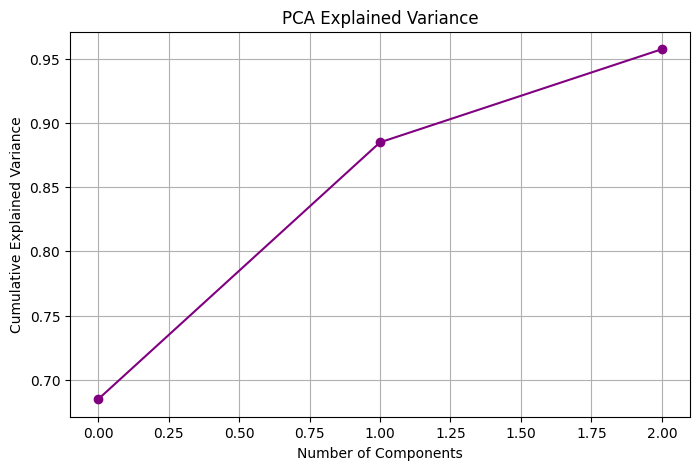

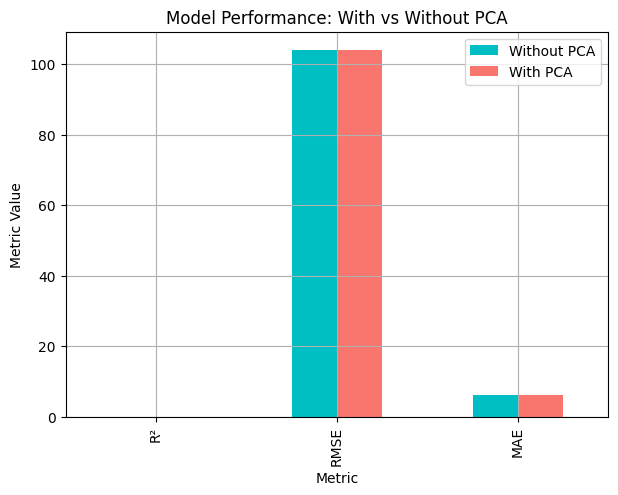

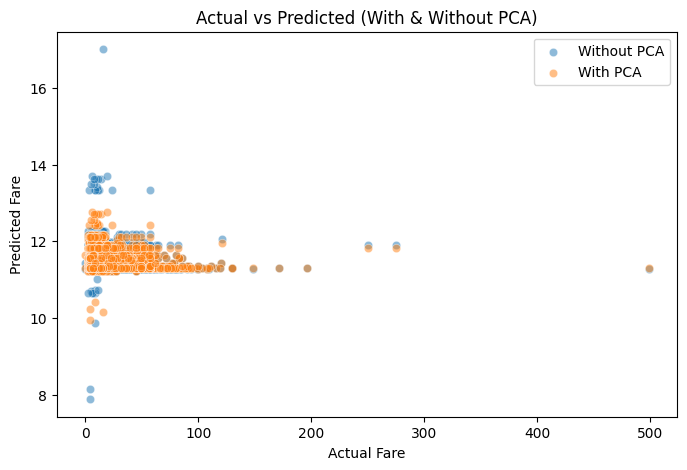

In [13]:
# --- VISUAL COMPARISONS ---

# 1️⃣ Explained Variance by PCA
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

# 2️⃣ Comparison of Metrics
metrics = pd.DataFrame({
    'Metric': ['R²', 'RMSE', 'MAE'],
    'Without PCA': [r2_no_pca, rmse_no_pca, mae_no_pca],
    'With PCA': [r2_pca, rmse_pca, mae_pca]
}).set_index('Metric')

metrics.plot(kind='bar', figsize=(7,5), color=['#00BFC4', '#F8766D'])
plt.title("Model Performance: With vs Without PCA")
plt.ylabel("Metric Value")
plt.grid(True)
plt.show()

# 3️⃣ Actual vs Predicted Comparison
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=pred, label='Without PCA', alpha=0.5)
sns.scatterplot(x=y_test, y=pred_pca, label='With PCA', alpha=0.5)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Actual vs Predicted (With & Without PCA)")
plt.legend()
plt.show()